In [17]:
import os
import SimpleITK as sitk
import numpy as np
from tqdm.autonotebook import tqdm

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

In [18]:
DATASET_PATH = f"../data/BRATS2013/Image_Data/HG"

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/216 [00:00<?, ?it/s]

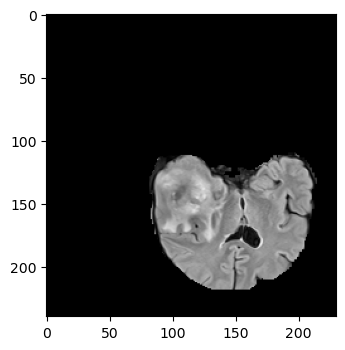

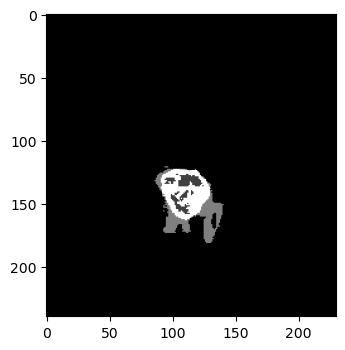

In [21]:
obs_id_list = os.listdir(DATASET_PATH)

dataset_og = []

obs_id_pbar = tqdm(obs_id_list, colour="darkviolet")
slice_pbar = tqdm(range(216), colour="#008080", leave=False)

x_sizes = []
y_sizes = []

x_y_size_count = {}

for obs_id in obs_id_list:
  
  modalities_og = []
  label_og = []
  
  obs_full_path = f"{DATASET_PATH}/{obs_id}"
  # print(f"obs_full_path: {obs_full_path}")

  obs_modalities_list = os.listdir(obs_full_path)
  # print(f"obs_modality_list: {obs_modalities_list}")

  for obs_modality in obs_modalities_list:
    # print("\n\n")
    # print(f"obs_modality: {obs_modality}")

    img_path = f"{obs_full_path}/{obs_modality}"
    # print(f"img_path: {img_path}")

    img_name = list(
      filter(lambda name: "_N4ITK.mha" in name, os.listdir(img_path))
    )[0]
    # print(f"img_name: {img_name}")
    
    img = sitk.ReadImage(f"{img_path}/{img_name}")
    img_arr = sitk.GetArrayFromImage(img)
    # print(img_arr.shape)

    if (".XX.XX.OT" not in obs_modality): 
      modalities_og.append(img_arr)
    
    else: 
      label_og.append(img_arr)

  modalities_np = np.asarray(modalities_og)
  # print(f"modalities_np.shape: {modalities_np.shape}")
  modalities_np_reshaped = np.transpose(modalities_np, (2, 0, 1, 3))
  # print(f"modalities_np_reshaped.shape: {modalities_np_reshaped.shape}")

  label_np = np.asarray(label_og)
  label_np_reshaped = np.transpose(label_np, (2, 0, 1, 3))

  slice_pbar.reset()

  for slice in range(modalities_np_reshaped.shape[0]):

    export_base_path = "/".join(obs_full_path.split("/")[:3])
    export_base_path = export_base_path.replace("BRATS2013", "BRATS2013_unstacked_slices")

    export_dir_name = f"{obs_id}_{str(slice).zfill(3)}"
    
    slice_img = modalities_np_reshaped[slice, ...]
    label_img = label_np_reshaped[slice, ...]

    slice_img = np.pad(
      slice_img, 
      ((0,0), ((240-slice_img.shape[1]),0),(230-slice_img.shape[2],0)), 
      'constant'
    )
    
    label_img = np.pad(
      label_img, 
      ((0,0), ((240-label_img.shape[1]),0),(230-label_img.shape[2],0)), 
      'constant'
    )

    slice_pbar.update(1)

  obs_id_pbar.update(1)
    

  